In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.models import Sequential

In [3]:
from numpy.random import seed
seed(52)
tf.random.set_seed(52)

In [4]:
data_dir_train = pathlib.Path('/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size,image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size,image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [11]:
print(original_df.shape)

(2239, 2)


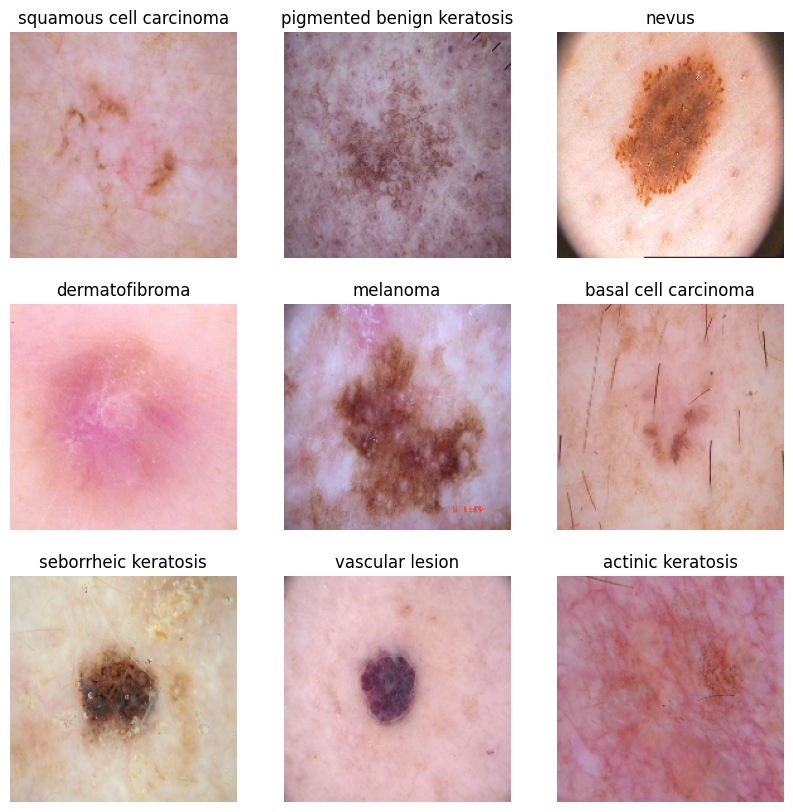

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(7):
    parsed_labels=[]
    count=1
    for i in range(len(labels)):
        if (labels[i] not in parsed_labels) and (count <=9):
            ax = plt.subplot(3, 3, count)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            parsed_labels.append(labels[i])
            count+=1

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Flatten, Conv2D , MaxPool2D

In [15]:
num_classes=9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [16]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 74s 1s/step - loss: 1.5936 - accuracy: 0.4336 - val_loss: 1.5413 - val_accuracy: 0.4430
Epoch 2/20
56/56 [==============================] - 66s 1s/step - loss: 1.5686 - accuracy: 0.4392 - val_loss: 1.6059 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 60s 1s/step - loss: 1.5976 - accuracy: 0.4481 - val_loss: 1.4694 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 61s 1s/step - loss: 1.5156 - accuracy: 0.4581 - val_loss: 1.4713 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 61s 1s/step - loss: 1.5290 - accuracy: 0.4593 - val_loss: 1.8752 - val_accuracy: 0.3311
Epoch 6/20
56/56 [==============================] - 61s 1s/step - loss: 1.5066 - accuracy: 0.4626 - val_loss: 1.4235 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 61s 1s/step - loss: 1.4501 - accuracy: 0.4777 - val_loss: 1.4275 - val_accuracy: 0.5034
Epoch 8/20
56/56 [==

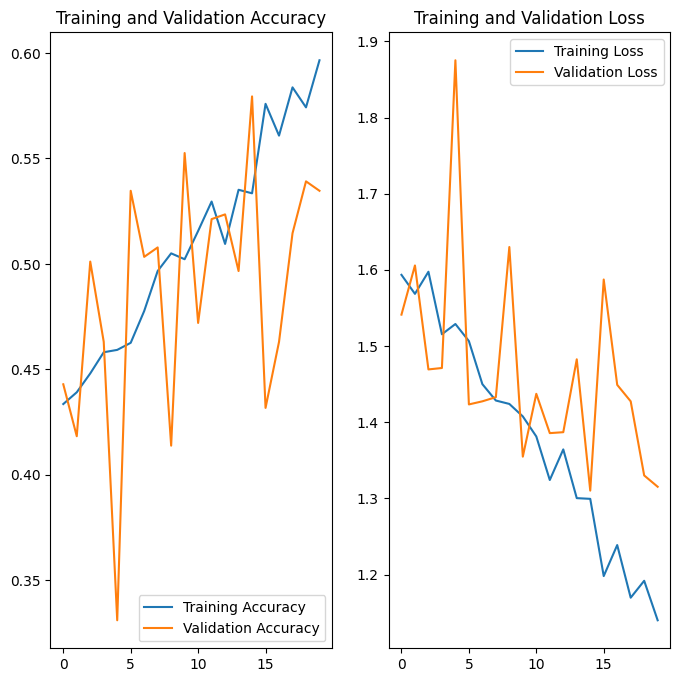

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# select first batch of images
image, label = next(iter(train_ds))

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

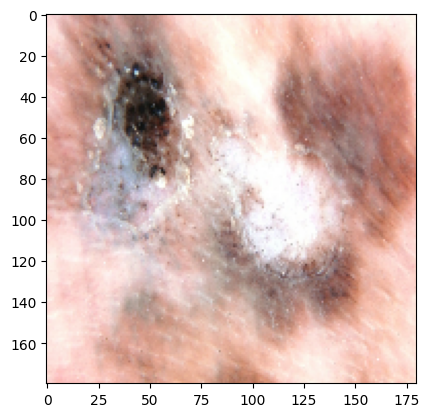

In [23]:
# print an image
plt.imshow(image[0].numpy().astype("uint8"))

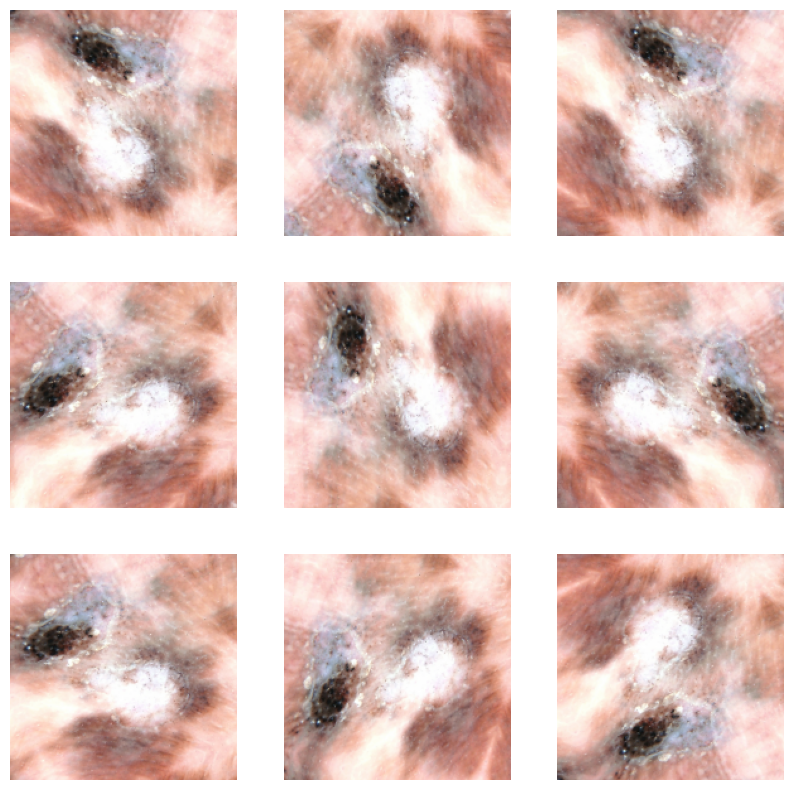

In [24]:
# print rotatio
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

In [27]:
num_classes=9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [28]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 78s 1s/step - loss: 2.0433 - accuracy: 0.1953 - val_loss: 2.0527 - val_accuracy: 0.1566
Epoch 2/25
56/56 [==============================] - 65s 1s/step - loss: 2.0160 - accuracy: 0.2137 - val_loss: 2.0243 - val_accuracy: 0.1611
Epoch 3/25
56/56 [==============================] - 68s 1s/step - loss: 2.0016 - accuracy: 0.2427 - val_loss: 2.0507 - val_accuracy: 0.1924
Epoch 4/25
56/56 [==============================] - 66s 1s/step - loss: 1.9911 - accuracy: 0.2372 - val_loss: 1.9684 - val_accuracy: 0.2752
Epoch 5/25
56/56 [==============================] - 66s 1s/step - loss: 1.9694 - accuracy: 0.2801 - val_loss: 1.9518 - val_accuracy: 0.2729
Epoch 6/25
56/56 [==============================] - 65s 1s/step - loss: 1.9514 - accuracy: 0.2684 - val_loss: 1.9462 - val_accuracy: 0.2864
Epoch 7/25
56/56 [==============================] - 67s 1s/step - loss: 1.9353 - accuracy: 0.2734 - val_loss: 1.9108 - val_accuracy: 0.3154
Epoch 8/25
56/56 [==

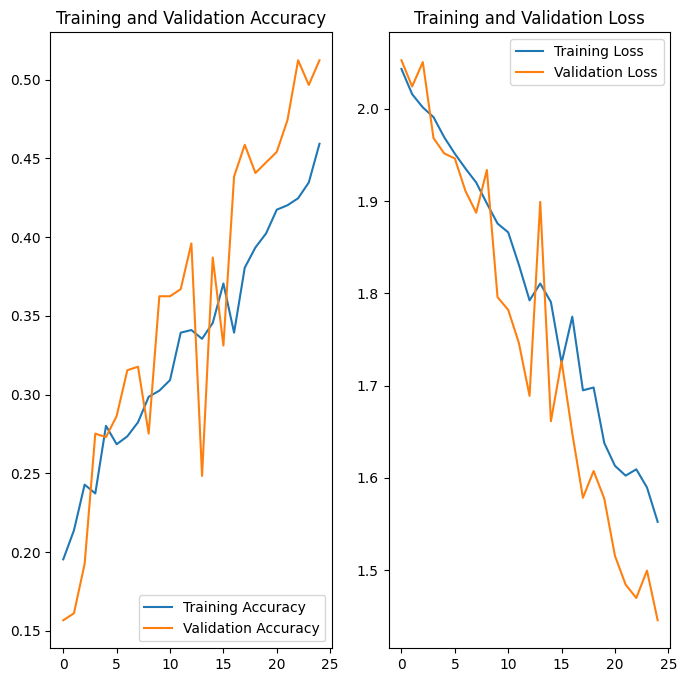

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
for i in class_names:
    directory= pathlib.Path(os.path.join('/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train',i))
    length=len(list(directory.glob('*')))
    print(f'{i} contains {length}')

actinic keratosis contains 114
basal cell carcinoma contains 376
dermatofibroma contains 95
melanoma contains 438
nevus contains 357
pigmented benign keratosis contains 462
seborrheic keratosis contains 77
squamous cell carcinoma contains 181
vascular lesion contains 139


In [34]:
!pip install Augmentor

In [37]:
path_to_training_dataset=os.path.join("Skin cancer ISIC The International Skin Imaging Collaboration\Train" , "")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0D3469FAF0>: 100%|██████████| 500/500 [00:22<00:00, 22.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0D346DF250>: 100%|██████████| 500/500 [00:24<00:00, 20.72 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0D44441750>: 100%|██████████| 500/500 [00:25<00:00, 19.79 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A0D34629870>: 100%|██████████| 500/500 [01:48<00:00,  4.62 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7A0D440E0100>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0D3C1D3730>: 100%|██████████| 500/500 [00:25<00:00, 19.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A0D44440460>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0D3DFAA530>: 100%|██████████| 500/500 [00:25<00:00, 19.66 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0D44213220>: 100%|██████████| 500/500 [00:25<00:00, 19.78 Samples/s]


In [38]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011043.jpg_f33aa5dd-9f2b-4cfc-a035-362491cc33b6.jpg',
 '/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000302.jpg_0fa66718-351c-4521-972f-8863b9765889.jpg',
 '/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000313.jpg_2af443e2-cd15-4241-9966-0e168384063f.jpg',
 '/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011040.jpg_fccb0388-a3c4-4c82-ac91-708c6ffc584d.jpg',
 '/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010536.jpg_9aa01799-2d4b-4109-bd18-a7f0b5955f54.jpg',
 '/content/drive/MyDrive/

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [40]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
import pandas as pd

In [43]:
new_df = pd.concat([original_df, df2], ignore_index=True)

In [ ]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [46]:
new_df['Label'].value_counts()

Label
Train                         2239
melanoma                       500
dermatofibroma                 500
basal cell carcinoma           500
actinic keratosis              500
seborrheic keratosis           500
vascular lesion                500
squamous cell carcinoma        500
pigmented benign keratosis     500
nevus                          500
Name: count, dtype: int64

In [47]:
batch_size = 32
img_height = 180
img_width = 180

In [50]:
data_dir_train=pathlib.Path("/content/drive/MyDrive/PROJECT/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [52]:
## your code goes here
num_classes=9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.0001))
])

In [53]:
## your code goes here
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

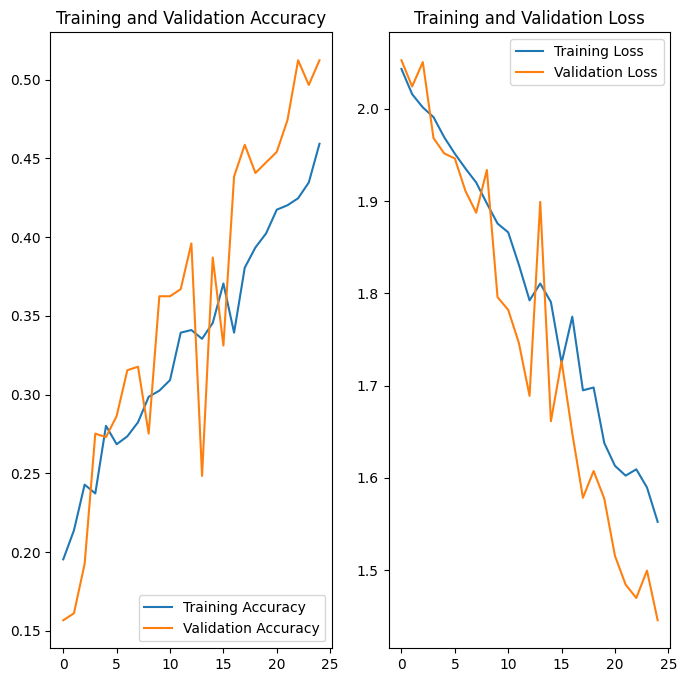

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
